# Question 3

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  #importing libraries

In [5]:
df = pd.read_csv('training_data.csv')  #reading csv file

In [7]:
col_name = ['timeforcharge','voltage','batterylasted']   #declaring columns names

In [8]:
df.columns = col_name  #giving columns name

In [9]:
df.head()

,timeforcharge,voltage,batterylasted
0,7.14,220,8.00
1,2.72,220,5.44
2,3.87,220,7.74
3,1.90,220,3.80
4,7.82,220,8.00


In [10]:
df['voltage'].unique()  #voltage column has only one value

array([220], dtype=int64)

In [11]:
df.dtypes  

timeforcharge    float64
voltage            int64
batterylasted    float64
dtype: object

In [14]:
round(df['timeforcharge'].mean(),2)  #mean value of charging time is 4.59 unit time

4.59

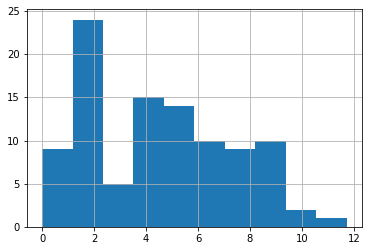

In [15]:
#univariate Analysis
df['timeforcharge'].hist(bins=10)
plt.show()       # for 1-2 unit time laptop is being charged and ranges from o to approx. 11 

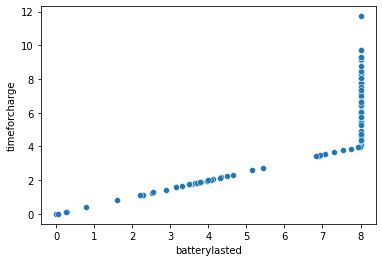

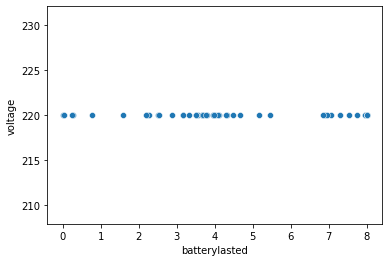

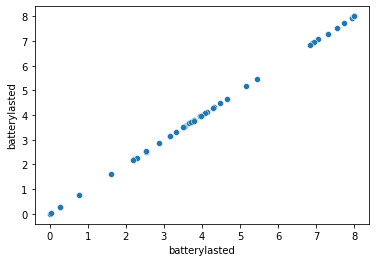

In [16]:
#bivariate Analysis
for i in df.columns:
    sns.scatterplot(x='batterylasted',y=i,data=df)
    plt.show() 
#observations:
#Battery won't sustain for more than 8 hours 
#time of charging is positively correlated with battery
#voltage shows horizontal graph meaning r=0 and both the variables are independent of each other

<AxesSubplot:>

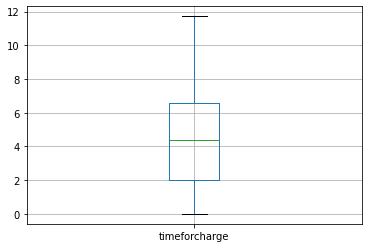

In [17]:
df.boxplot('timeforcharge')

In [19]:
df.drop('voltage',axis=1,inplace=True)  #dropping of voltage variable 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [21]:
x_train,x_test,y_train,y_test = train_test_split(df['timeforcharge'],df['batterylasted'],test_size=.33) #splitting the data in train test

In [27]:
lr = LinearRegression()

lr.fit(x_train.to_numpy().reshape(-1, 1), y_train.to_numpy())  #fitting the model

LinearRegression()

In [30]:
predict = lr.predict(x_test.to_numpy().reshape(-1, 1))


In [31]:
from sklearn.metrics import r2_score
r2_score(predict,y_test.to_numpy().reshape(-1, 1))

0.5860094044228635

In [33]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


r2 score 0.9975470070928282
cross score nan


<AxesSubplot:xlabel='batterylasted'>

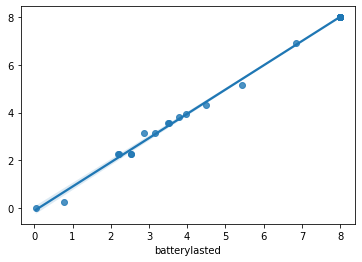

In [41]:
obj_dt = DecisionTreeRegressor()
obj_dt.fit(x_train.to_numpy().reshape(-1, 1),y_train.to_numpy().reshape(-1, 1))
p=obj_dt.predict(x_test.to_numpy().reshape(-1, 1))

print("r2 score",r2_score(p,y_test))
print('cross score',cross_val.mean())
sns.regplot(x=y_test, y=p, data=df)  #best result is given by this model 

r2 score 0.98688245017991
cross score nan


<AxesSubplot:xlabel='batterylasted'>

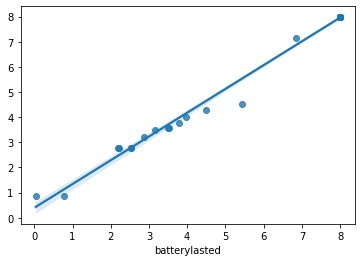

In [40]:
obj_ = KNeighborsRegressor()
obj_.fit(x_train.to_numpy().reshape(-1, 1),y_train.to_numpy().reshape(-1, 1))
p=obj_.predict(x_test.to_numpy().reshape(-1, 1))
print("r2 score",r2_score(p,y_test.to_numpy().reshape(-1, 1)))
print('cross score',cross_val.mean())
sns.regplot(x=y_test, y=p, data=df)

In [43]:
import pickle
time_pred = 'time.pkl'
pickle.dump(obj_dt,open(time_pred,'wb'))    #saving best model

In [45]:
model_load = pickle.load(open(time_pred,'rb'))   #loading the model to predict the result for testing data
pred_test = model_load.predict(y_test.to_numpy().reshape(-1,1))
pred_test=pd.DataFrame(pred_test)
pred_test   #predicted values

,0
0,8.00
1,6.90
2,8.00
3,8.00
4,8.00
5,8.00
6,8.00
7,8.00
8,8.00
9,8.00


I have only used r2 score in the performance matrix as this is univariate linear regression problem
Future scope:
Number of independent variable would be helpful to predict the y 

# Question 2

In [10]:
def howmanygames(p,d,m,s):
    p1=p
    l=[p]
    n=1
    while(p1>0):
        k=p1-d
        if(k>m):
            n=n+1
            l.append(k)
            p1=p1-d
        else:
            p1=p1-d
    finallist = []
    finallist.append(n)
    finallist.append(l)
    print(finallist)
        
#time complexity would depend on the value of d (how many times thw while loop will run)    
#However it would be :
# O(log2(p1) + o(1))

In [11]:
howmanygames(20,3,6,70)

[5, [20, 17, 14, 11, 8]]


# Question 1

In [46]:
words = pd.read_csv('dictionary.csv')

In [48]:
words = words.to_numpy()

array([['aah'],
       ['aahed'],
       ['aahing'],
       ...,
       ['zymurgy'],
       ['zyzzyva'],
       ['zyzzyvas']], dtype=object)